[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1OkBUx9wjEaoFXjP2sfq6FdtVOa1SfJHe?authuser=0#scrollTo=ned79thuQczw)

## **Conexión con Kaggle para abrir fácilmente los datasets.**

Se añaden los códigos para poder subir los datasets, el procedimiento fue el siguiente:

1. Entramos a nuestra cuenta de Kaggle, Settings y luego en API (Create new Token).
2. El paso anterior me descarga un archivo .Json que contiene mi nombre de cuenta y una llave (Esto se subió a este Notebook).
3. Se añadieron los códigos siguientes y en el último se debe poner el nombre de la competición que se encuentra al final de la sección "Data" de la misma competición.

In [1]:
!pip install kaggle
!mkdir ~/.kaggle #Se instala la librería de Kaggle
!touch ~/.kaggle/kaggle.json
# Generado desde la página de Kaggle
api_token ={"username":"josealejandrourrego","key":"c42e706678df9b3283b5473dbe2c0c8a"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c DontGetKicked
!unzip DontGetKicked.zip #Se descomprime el archivo .zip donde está el dataset

 49% 5.00M/10.2M [00:00<00:00, 19.6MB/s]
100% 10.2M/10.2M [00:00<00:00, 32.9MB/s]
Archive:  DontGetKicked.zip
  inflating: Carvana_Data_Dictionary.txt  
  inflating: example_entry.csv       
  inflating: test.csv                
  inflating: test.zip                
  inflating: training.csv            
  inflating: training.zip            


# **1. Importación de librerías**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **2. Llamado a los datos**

In [4]:
#Este primer archivo txt contiene todas las variables con su explicación para el desarrollo de los modelos
características= open("Carvana_Data_Dictionary.txt")
print(características.read())

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

In [5]:
data=pd.read_csv("training.csv") # Dataset que contiene el 60% de los datos totales (destinados a entrenamiento)
#Los datos totales train + test son 121756
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


# **3. Limpieza preliminar de los datos**

In [6]:
# Se muestran 5 filas aleatorias de entre todos los datos de entrenamiento
data.sample(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
13198,13208,0,12/6/2010,MANHEIM,2007,3,CHRYSLER,PT CRUISER,Bas,4D SEDAN,...,8622.0,9714.0,NaN,NaN,18880,27542,NC,5600.0,0,975
35996,36019,0,8/26/2010,MANHEIM,2005,5,FORD,TAURUS,SE,4D SEDAN SE FFV,...,7499.0,9117.0,NaN,NaN,16044,22403,VA,5100.0,0,983
60996,61025,0,1/5/2010,MANHEIM,2006,4,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,...,11288.0,13623.0,NaN,NaN,19662,63044,MO,6955.0,0,983
15626,15636,0,1/6/2009,MANHEIM,2006,3,DODGE,CARAVAN GRAND FWD V6,Bas,MINIVAN 3.3L CARGO,...,5725.0,6843.0,NaN,NaN,20207,77041,TX,6165.0,0,1251
2353,2356,1,12/29/2009,ADESA,2008,1,DODGE,CHARGER V6,Bas,4D SEDAN 2.7L,...,14189.0,15135.0,NaN,NaN,52117,45005,OH,9840.0,0,1086


In [7]:
# Se revisa si existen valores nulos o faltantes de entre todos los tipos de variables (Numéricas + Categóricas)
data.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

De la línea de código anterior se puede concluir que existen muchos datos nulos o faltantes en específicamente 5 variables
1. Trim: Nivel de equipamiento del vehículo
2. Wheel Type y Wheel type ID: tipo de ruedas con su ID
3. PRIMEUNIT: Identifica si el vehículo en cuestión tiene una demanda elevada
4. AUCGUART: Nivel de garantía otorgada por la subasta para el vehículo

De este primer análisis se concluye que las variables que involucran algún reporte por parte de la subasta sobre el estado pasado (1), presente (2,3) y futuro (4) del vehículo subastado tiene muchos datos faltantes ya sea por negligencia o con el objetivo de sacar algún provecho por parte de la subasta ocultando estos datos

Además, se eliminan las siguientes columnas ya que en nuestra opinión no aportan mucha información al análisis.

1. RefID: Ya que esta columna solo nos da información de la numeración de las filas dentro del mismo dataframe.
2. PurchDate: La fecha en la que se compró el vehículo nos parece poco relevante porque en cualquier temporada del año se puede o no obtener una compra patada.
3. VehicleAge: Se elimina la edad del vehículo ya que su fecha de fabricación nos parece más relevante (VehYear) debido a que el posible averió del vehículo pudo haber venido de fábrica y esto se determina a partir del lote o fecha de fabricación.
4. Se eliminan igualmente las columnas modelo (Model) y submodelo (SubModel) ya que, con el solo fabricante, es decir, "make" se puede determinar si el vehículo tiene cierta predisposición a ser una mala compra.
5. Color: Se elimina esta variable ya que la apariencia superficial del vehículo no nos dice nada, porque un vehículo puede tener cierto color que lo predispone a ser "exclusivo" como el negro, pero podría representar una posible compra patada.
6. BYRNO: Esta columna correspondiente al NIT o representación numérica del comprador no nos da más información, salvo conocer el comprador.
7. VNZIP1: El código postal donde se compró el auto tampoco tiene mucha relevancia según nuestro juicio.+
8. VNST: El estado donde fue comprado tampoco nos es de utilidad.

Estas columnas se eliminan en primera instancia ya que tienen muchos datos faltantes o no nos brindan mucha información.

In [8]:
#Se eliminan las variables que no son de interés del dataframe
data=data.copy()
datosNuevos=data.drop(["PurchDate","WheelType","WheelTypeID","WheelType","RefId","PRIMEUNIT","AUCGUART","Model","SubModel","VehicleAge",
                       "Color","BYRNO","VNZIP1","Trim","VNST"],axis=1)
datosNuevos

#Este dataframe construidos corresponde a los datos que usaremos para el entrenamiento de los modelos

,IsBadBuy,Auction,VehYear,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,2006,MAZDA,AUTO,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113
1,0,ADESA,2004,DODGE,AUTO,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053
2,0,ADESA,2005,DODGE,AUTO,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389
3,0,ADESA,2004,DODGE,AUTO,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630
4,0,ADESA,2005,FORD,MANUAL,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,2001,MERCURY,AUTO,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,4200.0,0,993
72979,0,ADESA,2007,CHEVROLET,AUTO,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,6200.0,0,1038
72980,0,ADESA,2005,JEEP,AUTO,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,8200.0,0,1893
72981,0,ADESA,2006,CHEVROLET,AUTO,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,7000.0,0,1974


# **4. Data Cleaning e imputación de datos categóricos (Entrenamiento)**

A continuación, se seleccionan los datos categóricos de nuestro dataframe de datos previamente filtrado

In [9]:
datos_categoricos = datosNuevos.select_dtypes(include=['object','category'])
datos_categoricos

,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER
1,ADESA,DODGE,AUTO,AMERICAN,LARGE TRUCK,CHRYSLER
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM,CHRYSLER
3,ADESA,DODGE,AUTO,AMERICAN,COMPACT,CHRYSLER
4,ADESA,FORD,MANUAL,AMERICAN,COMPACT,FORD
...,...,...,...,...,...,...
72978,ADESA,MERCURY,AUTO,AMERICAN,MEDIUM,FORD
72979,ADESA,CHEVROLET,AUTO,AMERICAN,MEDIUM,GM
72980,ADESA,JEEP,AUTO,AMERICAN,MEDIUM SUV,CHRYSLER
72981,ADESA,CHEVROLET,AUTO,AMERICAN,LARGE,GM


A continuación, visualizamos los datos faltantes de entre los datos categóricos para realizar la imputación de datos faltantes, lo cual consiste en la sustitución de valores no informados o reportados por otros.

In [10]:
datos_categoricos.isna().sum()

Auction                 0
Make                    0
Transmission            9
Nationality             5
Size                    5
TopThreeAmericanName    5
dtype: int64

De la anterior línea de código se concluye que los datos categóricos presentes no poseen una gran cantidad de datos faltantes, por lo que se reemplazan dichos datos por la moda, es decir, por el término que más veces se repite en cada columna.

Esto se hace pensando en que los datos categóricos al estar compuestos por nombres propios, se intuye que el nombre propio que más se repite dentro de los datos no faltantes seguirá esta tendencia para los faltantes.

In [11]:
datos_categoricos['Transmission'].fillna(datos_categoricos['Transmission'].mode()[0], inplace=True)
datos_categoricos['Nationality'].fillna(datos_categoricos['Nationality'].mode()[0], inplace=True)
datos_categoricos['Size'].fillna(datos_categoricos['Size'].mode()[0], inplace=True)
datos_categoricos['TopThreeAmericanName'].fillna(datos_categoricos['TopThreeAmericanName'].mode()[0], inplace=True)
datos_categoricos

,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER
1,ADESA,DODGE,AUTO,AMERICAN,LARGE TRUCK,CHRYSLER
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM,CHRYSLER
3,ADESA,DODGE,AUTO,AMERICAN,COMPACT,CHRYSLER
4,ADESA,FORD,MANUAL,AMERICAN,COMPACT,FORD
...,...,...,...,...,...,...
72978,ADESA,MERCURY,AUTO,AMERICAN,MEDIUM,FORD
72979,ADESA,CHEVROLET,AUTO,AMERICAN,MEDIUM,GM
72980,ADESA,JEEP,AUTO,AMERICAN,MEDIUM SUV,CHRYSLER
72981,ADESA,CHEVROLET,AUTO,AMERICAN,LARGE,GM


A continuación, se revisan nuevamente los datos para verificar si se llenaron
los datos por la moda

In [12]:
datos_categoricos.isna().sum() #Efectivamente, ahora ya no existen datos nulos o faltantes dentro de los datos categóricos

Auction                 0
Make                    0
Transmission            0
Nationality             0
Size                    0
TopThreeAmericanName    0
dtype: int64

Ahora se procede a realizar la conversión de las variables categóricas a números binarios (Codificación en caliente), donde 0 indica inexistente y 1 indica que si existe.

In [13]:
datos_categoricos = datos_categoricos.astype(str)
DatosCategoricos = pd.get_dummies(datos_categoricos)
DatosCategoricos

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72979,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72980,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
72981,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **5. Data Cleaning e imputación de datos numéricos (Entrenamiento)**

A continuación, se seleccionan los datos numéricos de nuestro dataframe de datos (datosNuevos) previamente filtrado

In [14]:
datos_numericos = datosNuevos._get_numeric_data()
datos_numericos

,IsBadBuy,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,0,2006,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113
1,0,2004,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053
2,0,2005,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389
3,0,2004,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630
4,0,2005,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,4200.0,0,993
72979,0,2007,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,6200.0,0,1038
72980,0,2005,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,8200.0,0,1893
72981,0,2006,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,7000.0,0,1974


A continuación, visualizamos los datos faltantes de entre los datos numéricos para realizar la imputación de datos faltantes, lo cual consiste en la sustitución de valores no informados o reportados por otros.

In [15]:
datos_numericos.isna().sum()

IsBadBuy                               0
VehYear                                0
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice     18
MMRAcquisitionAuctionCleanPrice       18
MMRAcquisitionRetailAveragePrice      18
MMRAcquisitonRetailCleanPrice         18
MMRCurrentAuctionAveragePrice        315
MMRCurrentAuctionCleanPrice          315
MMRCurrentRetailAveragePrice         315
MMRCurrentRetailCleanPrice           315
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

A diferencia de los datos categóricos, para los datos numéricos se recomienda en la teoría la imputación de datos faltantes a partir de la media. A continuación, se realiza este reemplazo para todas las columnas de los datos numéricos con datos faltantes

In [16]:
datos_numericos['MMRAcquisitionAuctionAveragePrice'].fillna(datos_numericos['MMRAcquisitionAuctionAveragePrice'].mean(), inplace=True)
datos_numericos['MMRAcquisitionAuctionCleanPrice'].fillna(datos_numericos['MMRAcquisitionAuctionCleanPrice'].mean(), inplace=True)
datos_numericos['MMRAcquisitionRetailAveragePrice'].fillna(datos_numericos['MMRAcquisitionRetailAveragePrice'].mean(), inplace=True)
datos_numericos['MMRAcquisitonRetailCleanPrice'].fillna(datos_numericos['MMRAcquisitonRetailCleanPrice'].mean(), inplace=True)
datos_numericos['MMRCurrentAuctionAveragePrice'].fillna(datos_numericos['MMRCurrentAuctionAveragePrice'].mean(), inplace=True)
datos_numericos['MMRCurrentAuctionCleanPrice'].fillna(datos_numericos['MMRCurrentAuctionCleanPrice'].mean(), inplace=True)
datos_numericos['MMRCurrentRetailAveragePrice'].fillna(datos_numericos['MMRCurrentRetailAveragePrice'].mean(), inplace=True)
datos_numericos['MMRCurrentRetailCleanPrice'].fillna(datos_numericos['MMRCurrentRetailCleanPrice'].mean(), inplace=True)
DatosNumericos=datos_numericos #Se renombra el dataframe con otro nombre
DatosNumericos

,IsBadBuy,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,0,2006,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113
1,0,2004,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053
2,0,2005,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389
3,0,2004,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630
4,0,2005,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,4200.0,0,993
72979,0,2007,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,6200.0,0,1038
72980,0,2005,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,8200.0,0,1893
72981,0,2006,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,7000.0,0,1974


A continuación, se revisan nuevamente los datos para verificar si se llenaron los datos por la media

In [17]:
DatosNumericos.isna().sum() #Efectivamente, ahora ya no existen datos nulos o faltantes dentro de los datos numéricos

IsBadBuy                             0
VehYear                              0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [18]:
#A continuación, se unen los dos dataframes preprocesados (Numéricos + Categóricos)
training=pd.concat([DatosNumericos,DatosCategoricos],axis=1)
training #De esta forma ya tendríamos totalmente filtrados y limpiados los datos de entrenamiento

,IsBadBuy,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,0,2006,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,...,0,0,0,0,0,0,0,0,0,1
1,0,2004,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,...,0,0,0,0,0,0,1,0,0,0
2,0,2005,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,...,0,0,0,0,0,0,1,0,0,0
3,0,2004,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,...,0,0,0,0,0,0,1,0,0,0
4,0,2005,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,...,0,0,0,0,0,0,0,1,0,0
72979,0,2007,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,...,0,0,0,0,0,0,0,0,1,0
72980,0,2005,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,...,1,0,0,0,0,0,1,0,0,0
72981,0,2006,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,...,0,0,0,0,0,0,0,0,1,0


# **6. Data Cleaning e imputación de datos numéricos y categoricos (Testeo)**

In [19]:
data1=pd.read_csv("test.csv") # Dataset que contiene el 40% de los datos totales (destinados a Evaluación o testeo)
#Los datos totales train + test son 121756
data1

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [20]:
# Se muestran 5 filas aleatorias de entre todos los datos de testeo
data1.sample(5)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
14893,87913,2/12/2010,OTHER,2005,5,CHRYSLER,TOWN & COUNTRY FWD V,LX,MINIVAN 3.3L LX,RED,...,8064.0,10115.0,NaN,NaN,20928,32750,FL,6545.0,0,1763
19439,92462,2/9/2010,MANHEIM,2005,5,CHEVROLET,COBALT,Bas,4D SEDAN,SILVER,...,7590.0,8399.0,NaN,NaN,18881,30331,GA,5630.0,0,853
45866,118903,6/16/2009,MANHEIM,2007,2,JEEP,COMPASS 2WD 4C 2.4L,Spo,4D SUV SPORT 2.4L,GREY,...,10877.0,12695.0,NaN,NaN,18111,37210,TN,8825.0,0,693
12770,85789,5/18/2009,ADESA,2005,4,FORD,FREESTYLE 2WD V6 3.0,SEL,4D CUV 3.0L SEL,BLUE,...,8959.0,10750.0,NaN,NaN,19638,33619,FL,7735.0,0,1313
31409,104438,7/21/2009,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,BROWN,...,3716.0,5126.0,NaN,NaN,18880,30315,GA,5500.0,0,3910


In [21]:
# Se revisa si existen valores nulos o faltantes de entre todos los tipos de variables (Numéricas + Categóricas)
data1.isna().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

A continuación, se eliminan las mismas variables anteriormente eliminadas en el dataframe de entrenamiento.

In [22]:
#Se eliminan las variables que no son de interés del dataframe
data1=data1.copy()
datosNuevosTest=data1.drop(["PurchDate","WheelType","WheelTypeID","WheelType","RefId","PRIMEUNIT","AUCGUART","Model","SubModel","VehicleAge",
                       "Color","BYRNO","VNZIP1","Trim","VNST"],axis=1)
datosNuevosTest

#Este dataframe construidos corresponde a los datos que usaremos para el entrenamiento de los modelos

,Auction,VehYear,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,2005,PONTIAC,AUTO,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,6500.0,0,2152
1,ADESA,2005,CHEVROLET,AUTO,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,6300.0,0,1118
2,ADESA,2006,DODGE,AUTO,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,9700.0,0,1215
3,ADESA,2002,SATURN,AUTO,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,4150.0,0,1933
4,ADESA,2007,HYUNDAI,AUTO,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,2005,FORD,AUTO,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,7955.0,0,1633
48703,MANHEIM,2007,TOYOTA,AUTO,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,7035.0,0,594
48704,MANHEIM,2006,KIA,AUTO,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,6335.0,0,594
48705,MANHEIM,2005,MAZDA,AUTO,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,8055.0,0,1038


In [23]:
datos_categoricosTest = datosNuevosTest.select_dtypes(include=['object','category'])
datos_categoricosTest

,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,PONTIAC,AUTO,AMERICAN,LARGE,GM
1,ADESA,CHEVROLET,AUTO,AMERICAN,MEDIUM,GM
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM SUV,CHRYSLER
3,ADESA,SATURN,AUTO,AMERICAN,MEDIUM,GM
4,ADESA,HYUNDAI,AUTO,OTHER ASIAN,COMPACT,OTHER
...,...,...,...,...,...,...
48702,MANHEIM,FORD,AUTO,AMERICAN,LARGE,FORD
48703,MANHEIM,TOYOTA,AUTO,TOP LINE ASIAN,COMPACT,OTHER
48704,MANHEIM,KIA,AUTO,OTHER ASIAN,MEDIUM,OTHER
48705,MANHEIM,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER


A continuación, visualizamos los datos faltantes de entre los datos categóricos para realizar la imputación de datos faltantes, lo cual consiste en la sustitución de valores no informados o reportados por otros.

In [24]:
datos_categoricosTest.isna().sum()

Auction                 0
Make                    0
Transmission            3
Nationality             7
Size                    7
TopThreeAmericanName    7
dtype: int64

De la anterior línea de código se concluye que los datos categóricos presentes no poseen una gran cantidad de datos faltantes, por lo que se reemplazan dichos datos por la moda, es decir, por el término que más veces se repite en cada columna.

Se realiza el mismo análisis que se hizo para los datos de entrenamiento

In [25]:
datos_categoricosTest['Transmission'].fillna(datos_categoricosTest['Transmission'].mode()[0], inplace=True)
datos_categoricosTest['Nationality'].fillna(datos_categoricosTest['Nationality'].mode()[0], inplace=True)
datos_categoricosTest['Size'].fillna(datos_categoricosTest['Size'].mode()[0], inplace=True)
datos_categoricosTest['TopThreeAmericanName'].fillna(datos_categoricosTest['TopThreeAmericanName'].mode()[0], inplace=True)
datos_categoricosTest

,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,PONTIAC,AUTO,AMERICAN,LARGE,GM
1,ADESA,CHEVROLET,AUTO,AMERICAN,MEDIUM,GM
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM SUV,CHRYSLER
3,ADESA,SATURN,AUTO,AMERICAN,MEDIUM,GM
4,ADESA,HYUNDAI,AUTO,OTHER ASIAN,COMPACT,OTHER
...,...,...,...,...,...,...
48702,MANHEIM,FORD,AUTO,AMERICAN,LARGE,FORD
48703,MANHEIM,TOYOTA,AUTO,TOP LINE ASIAN,COMPACT,OTHER
48704,MANHEIM,KIA,AUTO,OTHER ASIAN,MEDIUM,OTHER
48705,MANHEIM,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER


A continuación, se revisan nuevamente los datos para verificar si se llenaron los datos por la moda

In [26]:
datos_categoricosTest.isna().sum() #Efectivamente, ahora ya no existen datos nulos o faltantes dentro de los datos categóricos

Auction                 0
Make                    0
Transmission            0
Nationality             0
Size                    0
TopThreeAmericanName    0
dtype: int64

Ahora se procede a realizar la conversión de las variables categóricas a números binarios (Codificación en caliente), donde 0 indica inexistente y 1 indica que si existe

In [27]:
datos_categoricosTest = datos_categoricosTest.astype(str)
DatosCategoricosTest = pd.get_dummies(datos_categoricosTest)
DatosCategoricosTest

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48703,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48704,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48705,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


A continuación, se seleccionan los datos numéricos de nuestro dataframe de datos (datosNuevosTest) previamente filtrado

In [28]:
datos_numericosTest = datosNuevosTest._get_numeric_data()
datos_numericosTest

,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,2005,85377,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,6500.0,0,2152
1,2005,61873,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,6300.0,0,1118
2,2006,69283,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,9700.0,0,1215
3,2002,87889,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,4150.0,0,1933
4,2007,73432,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2005,88645,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,7955.0,0,1633
48703,2007,81862,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,7035.0,0,594
48704,2006,82451,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,6335.0,0,594
48705,2005,75760,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,8055.0,0,1038


A continuación, visualizamos los datos faltantes de entre los datos numéricos para realizar la imputación de datos faltantes, lo cual consiste en la sustitución de valores no informados o reportados por otros.

In [29]:
datos_numericosTest.isna().sum()

VehYear                                0
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice     10
MMRAcquisitionAuctionCleanPrice       10
MMRAcquisitionRetailAveragePrice      10
MMRAcquisitonRetailCleanPrice         10
MMRCurrentAuctionAveragePrice        143
MMRCurrentAuctionCleanPrice          143
MMRCurrentRetailAveragePrice         143
MMRCurrentRetailCleanPrice           143
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

A diferencia de los datos categóricos, para los datos numéricos se recomienda en la teoría la imputación de datos faltantes a partir de la media. A continuación, se realiza este reemplazo para todas las columnas de los datos numéricos con datos faltantes

In [30]:
datos_numericosTest['MMRAcquisitionAuctionAveragePrice'].fillna(datos_numericosTest['MMRAcquisitionAuctionAveragePrice'].mean(), inplace=True)
datos_numericosTest['MMRAcquisitionAuctionCleanPrice'].fillna(datos_numericosTest['MMRAcquisitionAuctionCleanPrice'].mean(), inplace=True)
datos_numericosTest['MMRAcquisitionRetailAveragePrice'].fillna(datos_numericosTest['MMRAcquisitionRetailAveragePrice'].mean(), inplace=True)
datos_numericosTest['MMRAcquisitonRetailCleanPrice'].fillna(datos_numericosTest['MMRAcquisitonRetailCleanPrice'].mean(), inplace=True)
datos_numericosTest['MMRCurrentAuctionAveragePrice'].fillna(datos_numericosTest['MMRCurrentAuctionAveragePrice'].mean(), inplace=True)
datos_numericosTest['MMRCurrentAuctionCleanPrice'].fillna(datos_numericosTest['MMRCurrentAuctionCleanPrice'].mean(), inplace=True)
datos_numericosTest['MMRCurrentRetailAveragePrice'].fillna(datos_numericosTest['MMRCurrentRetailAveragePrice'].mean(), inplace=True)
datos_numericosTest['MMRCurrentRetailCleanPrice'].fillna(datos_numericosTest['MMRCurrentRetailCleanPrice'].mean(), inplace=True)
DatosNumericosTest=datos_numericosTest #Se renombra el dataframe con otro nombre
DatosNumericosTest

,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,2005,85377,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,6500.0,0,2152
1,2005,61873,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,6300.0,0,1118
2,2006,69283,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,9700.0,0,1215
3,2002,87889,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,4150.0,0,1933
4,2007,73432,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2005,88645,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,7955.0,0,1633
48703,2007,81862,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,7035.0,0,594
48704,2006,82451,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,6335.0,0,594
48705,2005,75760,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,8055.0,0,1038


A continuación, se revisan nuevamente los datos para verificar si se llenaron los datos por la media

In [31]:
DatosNumericosTest.isna().sum() #Efectivamente, ahora ya no existen datos nulos o faltantes dentro de los datos numéricos

VehYear                              0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [32]:
#A continuación, se unen los dos dataframes preprocesados (Numéricos + Categóricos)
testing=pd.concat([DatosNumericosTest,DatosCategoricosTest],axis=1)
testing #De esta forma ya tendríamos totalmente filtrados y limpiados los datos de Testeo

,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,2005,85377,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,...,0,0,0,0,0,0,0,0,1,0
1,2005,61873,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,...,0,0,0,0,0,0,0,0,1,0
2,2006,69283,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,...,1,0,0,0,0,0,1,0,0,0
3,2002,87889,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,...,0,0,0,0,0,0,0,0,1,0
4,2007,73432,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2005,88645,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,...,0,0,0,0,0,0,0,1,0,0
48703,2007,81862,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,...,0,0,0,0,0,0,0,0,0,1
48704,2006,82451,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,...,0,0,0,0,0,0,0,0,0,1
48705,2005,75760,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
columnas1=testing.columns.values
columnasTesting = list(columnas1)
columnas2=training.columns.values
columnasTraining = list(columnas2)
print("Elementos diferentes en los dataframes:",   set(columnasTraining) - set(columnasTesting ))

Elementos diferentes en los dataframes: {'Transmission_Manual', 'Make_PLYMOUTH', 'Make_HUMMER', 'IsBadBuy', 'Make_TOYOTA SCION'}


El resultado anterior nos arroja que existen diferentes columnas para Testing y Trainig, cuando la única variable distinta debería ser "IsBadBuy". Vamos a buscar las variables una por una dentro de Testing para comparar.

In [34]:
datos_categoricosTest["Make"].value_counts() #Vamos a ver la cantidad de marcas por tipo en el daframe de testing

CHEVROLET     11486
DODGE          8095
FORD           7441
CHRYSLER       6050
PONTIAC        3001
KIA            1914
SATURN         1392
HYUNDAI        1311
NISSAN         1228
JEEP           1187
SUZUKI          873
MITSUBISHI      783
TOYOTA          780
MAZDA           704
MERCURY         620
BUICK           500
GMC             388
HONDA           318
OLDSMOBILE      163
SCION            85
ISUZU            85
VOLKSWAGEN       71
LINCOLN          66
VOLVO            42
CADILLAC         29
INFINITI         28
ACURA            26
LEXUS            19
SUBARU           12
MINI             10
Name: Make, dtype: int64

Del resultado anterior, vemos que no existen en el dataframe de testeo las marcas "HUMMER", "TOYOTA SCION" y "PLYMOUTH" por lo que debemos eliminar estas marcas del dataframe de Training.

In [35]:
datos_categoricosTest["Transmission"].value_counts() #Vamos a ver la cantidad de transmisiones por tipo en el dataframe de testing

AUTO      47013
MANUAL     1694
Name: Transmission, dtype: int64

Del resultado anterior vemos que dentro del dataframe Testeo no existe ninguna transmisión llamada "Trasmisión manual", por lo que se asume que el encargado de recopilar los datos cometió un error y tomo las variables "Transmisión manual" y "MANUAL" como distintas, por lo tanto vamos a nombrar todas las "Transmisión manual" como manual y a eliminar las marcas de autos sobrantes dentro del dataframe de Training.

In [36]:
datos_categoricos2=datos_categoricos.replace({"Transmission_Manual": "MANUAL","Manual":"MANUAL"}) #Convertimos el nombre "Transmision manual" por "MANUAL"
datos_categoricos2["Transmission"].value_counts() #En este caso vemos que existe otra "Manual", por lo que en el replace de arriba se cambia igualmente

AUTO      70407
MANUAL     2576
Name: Transmission, dtype: int64

In [37]:
DatosCategoricos = pd.get_dummies(datos_categoricos2) #Hacemos de nuevo la codificación en caliente
DatosCategoricos2=DatosCategoricos.drop(["Make_HUMMER","Make_TOYOTA SCION","Make_PLYMOUTH"],axis=1) #Eliminamos las columnas anteriormente definidas
DatosCategoricos2

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72979,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72980,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
72981,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
#A continuación, se unen los dos dataframes preprocesados (Numéricos + Categóricos)
training=pd.concat([DatosNumericos,DatosCategoricos2],axis=1)
training #De esta forma ya tendríamos totalmente filtrados y limpiados los datos de entrenamiento

,IsBadBuy,VehYear,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,0,2006,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,...,0,0,0,0,0,0,0,0,0,1
1,0,2004,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,...,0,0,0,0,0,0,1,0,0,0
2,0,2005,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,...,0,0,0,0,0,0,1,0,0,0
3,0,2004,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,...,0,0,0,0,0,0,1,0,0,0
4,0,2005,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,...,0,0,0,0,0,0,0,1,0,0
72979,0,2007,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,...,0,0,0,0,0,0,0,0,1,0
72980,0,2005,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,...,1,0,0,0,0,0,1,0,0,0
72981,0,2006,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
#Comparamos de nuevo
columnas1=testing.columns.values
columnasTesting = list(columnas1)
columnas2=training.columns.values
columnasTraining = list(columnas2)
print("Elementos diferentes en los dataframes:",   set(columnasTraining) - set(columnasTesting )) #En este caso vemos que ya no existe diferencia entre
#los dataframes, por lo que se puede decir que el procesado fue exitoso

Elementos diferentes en los dataframes: {'IsBadBuy'}


A continuación, se presentan las dos combinaciones de algoritmos no supervisados con algoritmos predictivos

# **7. Algoritmos no supervisados + Algoritmos predictivos**

Importamos librerías que implementaremos

In [44]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

 ## **7.1 PCA + Árbol de decisión**

El PCA (Principal Component Analyss) o análisis de componentes principales es un algoritmo no supervisado permite reducir la dimensionalidad  de los datos, es decir, intenta mantener todas las variables posibles pero se podrán prescindir de las menos importantes, de esta forma se podrá saber cuáles de las variables son mas o menos valiosas, a diferencia de una eliminación tradicional, nuestras nuevas variables son combinaciones de todas las variables originales, es decir, aunque algunas se eliminen se seguirá manteniendo la información útil de las variables iniciales.

Text(0, 0.5, 'Puntaje')

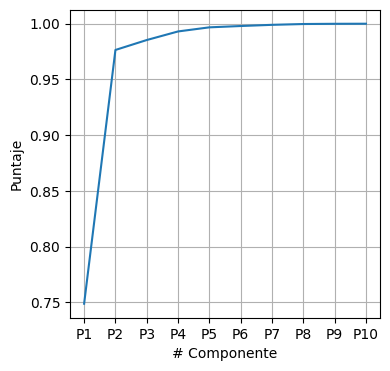

In [41]:
#En primer separamos nuestros datos para poder entrenarlos y evaluarlos
x_train=training.drop(["IsBadBuy"],axis=1) #Tomamos todos los datos del dataframe de entrenamiento menos la variable objetivo
y_train=training["IsBadBuy"]

#Se divide la muestra con un tamaño para el test del 30%
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train,y_train, test_size=0.3)

PrCoA=PCA(n_components= 10) #Numero de componentes a conservar, se elige 10 para tener un grado de calculo

#Se entrena el modelo
PrCoA.fit(X_train1)

#Aplicamos la reducción dimensional
t=PrCoA.transform(X_train1)
x1=[]
for i in range(t.shape[1]):
  x1.append(f"P{i+1}")

#Calculamos el porcnretaje de varianza explicada en cada uno de los componentes
y1=np.cumsum(PrCoA.explained_variance_ratio_)

#Se grafica el número de componentes (10) más influyentes o importantes entre si
fig,ax=plt.subplots(figsize=(4,4))
plt.plot(x1, y1)
plt.xlabel('# Componente')
plt.grid()
plt.ylabel('Puntaje')



In [42]:
PrCoA=PCA(n_components=10)
PrCoA.fit(X_train1)
XTRAIN=PrCoA.transform(X_train1)
XTEST=PrCoA.transform(X_test1)

#Se hace el llamado al modelo y se pone una profundidad máxima de 10, se intentaron con otras (2,5,7,12) y se concluyó que 10
#es el hiperparametro más idóneo, al igual que el uso balanceado
AB=DecisionTreeClassifier(max_depth=10, class_weight='balanced')

#Se entrena el modelo
AB.fit(XTRAIN,y_train1)

#Se hace la prediccion
Prediccion1=AB.predict(XTEST)

#Se calculan e imprimen las métricas de desempeño accuracy y precisión
accuracy = accuracy_score(y_test1, Prediccion1)
Precision=precision_score(y_test1, Prediccion1)
print(accuracy)
print(Precision)

0.6562685544644896
0.1865671641791045


## **7.1.1 Curva de aprendizaje (Arbol de Decisión + PCA)**

A continuación, se presenta la curva de aprendizaje con base a la métrica de desempeño "Accuracy".

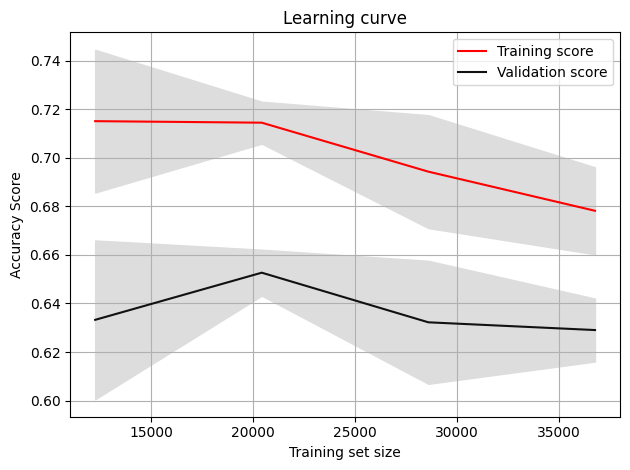

In [43]:
#Se usa el clasificador previamente entrenado y calibrado (AB)
train_sizes, train_scores, test_scores = learning_curve(AB, XTRAIN, y_train1, train_sizes= [0.3, 0.5,0.7,0.9], scoring ='accuracy')

#se crea la media y la desviación estándar del puntaje del conjunto de entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Se crea la media y la desviación estándar del puntaje del conjunto de prueba
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Se crean las bandas de los rangos
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")

#Se plotean los Graficos
plt.plot(train_sizes, train_mean, color="#FF0000",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Validation score")
plt.grid()
plt.title("Learning curve")
plt.xlabel('Training set size'), plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend()
plt.show()


 ## **7.2 PCA + Regresión logística**

In [48]:
#Se divide la muestra con un tamaño para el test del 30%
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_train,y_train, test_size=0.4)
PrCoA2=PCA(n_components= 10) #Numero de componentes a conservar, se elige 10 para tener un grado de calculo
PrCoA2.fit(X_train2)
XTRAIN=PrCoA2.transform(X_train2)
XTEST=PrCoA2.transform(X_test2)


#Se hace el llamado al modelo, después de varias iteraciones se concluyó que con una regularización C de 1, unas iteraciones máximas de 100.
RL = LogisticRegression(C=0.1,max_iter=100,solver='liblinear',penalty='l2')

#Se entrena el modelo
RL.fit(XTRAIN,y_train2)

#Se hace la prediccion
Prediccion2 = RL.predict(XTEST)

#Se hace el llamado al modelo y se pone una profundidad máxima de 10, se intentaron con otras (2,5,7,12) y se concluyó que 10
#es el hiperparametro más idóneo, al igual que el uso balanceado
AB=DecisionTreeClassifier(max_depth=10, class_weight='balanced')

#Se entrena el modelo
AB.fit(XTRAIN,y_train2)

#Se hace la prediccion
Prediccion1=AB.predict(XTEST)

#Se calculan e imprimen las métricas de desempeño accuracy y precisión
accuracy = accuracy_score(y_test2, Prediccion1)
Precision=precision_score(y_test2, Prediccion1)
print(accuracy)
print(Precision)


0.6319791738028362
0.1790361662029974


## **7.2.1 Curva de aprendizaje (Regresión logística + PCA)**

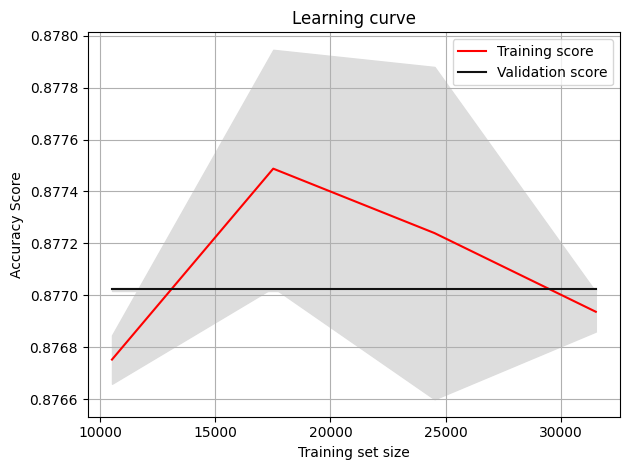

In [50]:
#Se usa el clasificador previamente entrenado y calibrado (RL)
train_sizes, train_scores, test_scores = learning_curve(RL, XTRAIN, y_train2, train_sizes= [0.3, 0.5,0.7,0.9], scoring ='accuracy')

#se crea la media y la desviación estándar del puntaje del conjunto de entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Se crea la media y la desviación estándar del puntaje del conjunto de prueba
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Se crean las bandas de los rangos
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")

#Se plotean los Graficos
plt.plot(train_sizes, train_mean, color="#FF0000",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Validation score")
plt.grid()
plt.title("Learning curve")
plt.xlabel('Training set size'), plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend()
plt.show()